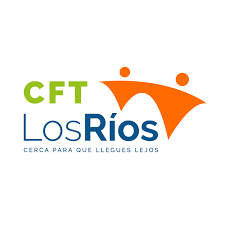

## Curso: Aprendizaje Supervisado
## Profesor: Diego Miranda Olavarría
#### Data Scientist

In [1]:
import pandas as pd

data = pd.read_csv('student.csv')

data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## Analisis Exploratorio de Datos

In [2]:
data.shape

(2392, 15)

In [3]:
data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [4]:
data.columns.values

array(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [6]:
data.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

## Separar los datos de la etiqueta

In [7]:
X = data.drop('GradeClass', axis=1) # datos 
y = data['GradeClass']   # etiqueta

## Separar los datos en conjuntos de entrenamiento y prueba

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

## Escalado de los datos

In [9]:
# El escalado de los datos sirve para normalizar los datos, es decir
# que la media este en 0 y la std en 1,
# solo se usa para algoritmos basados en distancia o en gradientes, no para los árboles

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Perceptrón Multicapa (Multilayer Perceptron)

In [10]:
from sklearn.neural_network import MLPClassifier

# Creamos el modelo
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

# Entrenar el modelo
mlp.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_mlp = mlp.predict(X_test)
y_pred_mlp

array([4., 2., 3., 0., 4., 2., 4., 3., 3., 4., 4., 4., 2., 3., 2., 4., 4.,
       4., 4., 3., 3., 4., 4., 1., 4., 4., 4., 2., 3., 3., 4., 4., 2., 1.,
       4., 4., 1., 2., 1., 4., 2., 0., 4., 3., 4., 3., 2., 4., 2., 4., 1.,
       1., 4., 4., 4., 1., 3., 2., 4., 4., 4., 3., 2., 4., 4., 4., 2., 3.,
       4., 1., 1., 4., 1., 2., 4., 2., 4., 4., 4., 4., 3., 1., 3., 4., 4.,
       4., 0., 4., 4., 4., 2., 4., 4., 4., 0., 4., 1., 4., 4., 4., 4., 3.,
       4., 3., 4., 3., 2., 4., 4., 4., 4., 3., 1., 4., 4., 4., 4., 2., 4.,
       3., 4., 2., 0., 4., 4., 4., 2., 4., 3., 2., 4., 0., 2., 4., 4., 4.,
       3., 4., 4., 4., 2., 4., 1., 4., 1., 4., 4., 3., 0., 4., 1., 4., 1.,
       4., 4., 4., 4., 4., 4., 1., 4., 4., 4., 4., 4., 4., 4., 4., 3., 1.,
       4., 1., 2., 4., 4., 2., 3., 4., 3., 4., 2., 3., 4., 2., 3., 2., 1.,
       4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 3., 2., 3., 4., 2., 1., 4.,
       2., 3., 4., 2., 3., 4., 4., 4., 4., 2., 2., 4., 2., 2., 4., 2., 4.,
       2., 0., 4., 4., 4.

## Métricas de evaluación

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

print("Classification Report:")
print(classification_report(y_test, y_pred_mlp))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.45      0.57        22
         1.0       0.63      0.69      0.66        49
         2.0       0.74      0.71      0.72        85
         3.0       0.76      0.76      0.76        86
         4.0       0.92      0.95      0.94       237

    accuracy                           0.82       479
   macro avg       0.76      0.71      0.73       479
weighted avg       0.82      0.82      0.82       479



In [12]:
# ROC-AUC (solo se puede hacer si tienes más de 2 clases, para multiclase usa 'ovo' o 'ovr')
# El área bajo la curva sirve para determinar 
y_prob = mlp.predict_proba(X_test)  
roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")
print(f'ROC-AUC: {roc_auc:.4f}')

ROC-AUC: 0.9585
